# 초음파 광물 예측
- Hidden Layer 수 변화, 그래프로 시각화

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# 실행할 떄마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
filename

Saving sonar.csv to sonar (4).csv


'sonar.csv'

In [4]:
df = pd.read_csv(filename, header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [5]:
df[60].unique()

array(['R', 'M'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(df[60].values)
X = df.iloc[:, :-1].values

### Train / Test dataset으로 분리

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, stratify=y_encoded, random_state=seed
)
X_train.shape, X_test.shape

((156, 60), (52, 60))

### 모델 생성/설정/학습/평가

#### Hidden Layer: 1 개

In [9]:
model_1 = Sequential([
      Dense(24, input_dim=60, activation='relu'),
      Dense(1, activation='sigmoid')
])
model_1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model_1.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)

In [10]:
train_acc = model_1.evaluate(X_train, y_train)
test_acc = model_1.evaluate(X_test, y_test)
print(f'Train data Accuracy: {train_acc[1]:.4f}\nTest data Accuracy: {test_acc[1]:.4f}')

2/2 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.8077
Train data Accuracy: 0.9423
Test data Accuracy: 0.8077


- 시각화

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

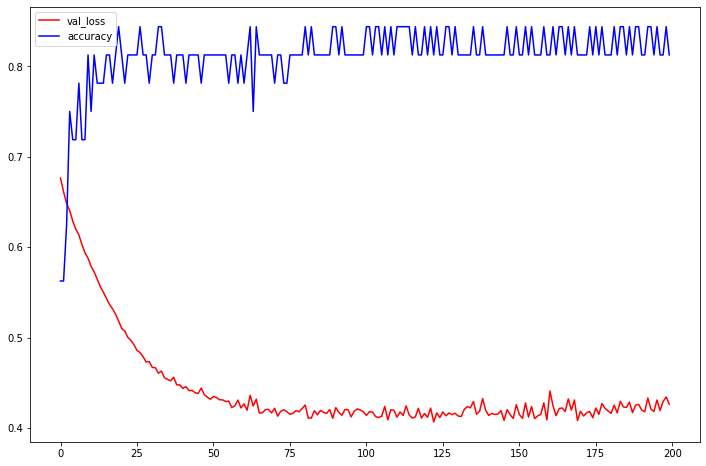

In [12]:
y_vloss = history.history['val_loss']
y_acc = history.history['val_accuracy']

x_len = np.arange(len(y_acc))
plt.figure(figsize=(12, 8))
plt.plot(x_len, y_vloss, "-", c="red", markersize=5, label='val_loss')   # 오차: 빨강
plt.plot(x_len, y_acc, "-", c="blue", markersize=5, label='accuracy')    # 정확도: 파랑
plt.legend()
plt.show()

#### Hidden Layer: 2 개

In [13]:
model_2 = Sequential([
      Dense(24, input_dim=60, activation='relu'),
      Dense(12, activation='relu'),
      Dense(1, activation='sigmoid')
])
model_2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model_2.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)

In [14]:
train_acc = model_2.evaluate(X_train, y_train)
test_acc = model_2.evaluate(X_test, y_test)
print(f'Train data Accuracy: {train_acc[1]:.4f}\nTest data Accuracy: {test_acc[1]:.4f}')

2/2 [==============================] - 0s 4ms/step - loss: 0.6179 - accuracy: 0.8654
Train data Accuracy: 0.9744
Test data Accuracy: 0.8654


- 시각화

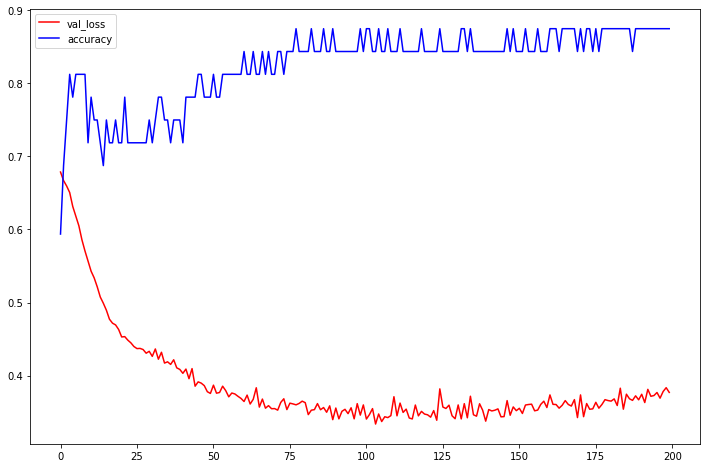

In [15]:
y_vloss = history.history['val_loss']
y_acc = history.history['val_accuracy']

x_len = np.arange(len(y_acc))
plt.figure(figsize=(12, 8))
plt.plot(x_len, y_vloss, "-", c="red", markersize=5, label='val_loss')   # 오차: 빨강
plt.plot(x_len, y_acc, "-", c="blue", markersize=5, label='accuracy')    # 정확도: 파랑
plt.legend()
plt.show()

### Hidden Layer: 4 개

In [16]:
model_4 = Sequential([
      Dense(24, input_dim=60, activation='relu'),
      Dense(18, activation='relu'),
      Dense(12, activation='relu'),
      Dense(6, activation='relu'),
      Dense(1, activation='sigmoid')
])
model_4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model_4.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)

In [17]:
train_acc = model_4.evaluate(X_train, y_train)
test_acc = model_4.evaluate(X_test, y_test)
print(f'Train data Accuracy: {train_acc[1]:.4f}\nTest data Accuracy: {test_acc[1]:.4f}')

2/2 [==============================] - 0s 3ms/step - loss: 1.0834 - accuracy: 0.8077
Train data Accuracy: 0.9679
Test data Accuracy: 0.8077


- 시각화

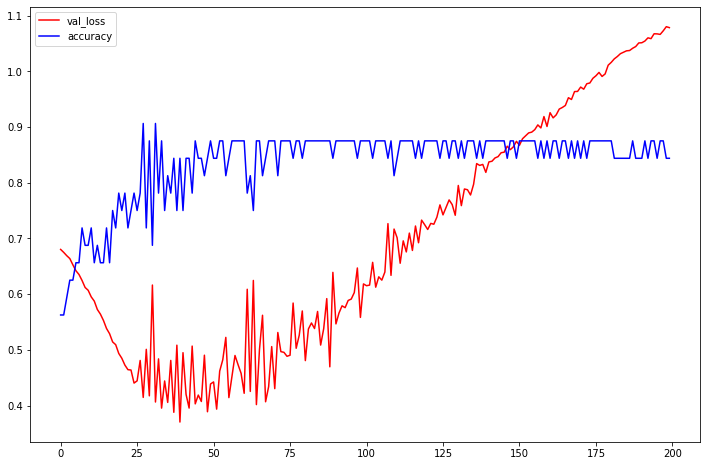

In [18]:
y_vloss = history.history['val_loss']
y_acc = history.history['val_accuracy']

x_len = np.arange(len(y_acc))
plt.figure(figsize=(12, 8))
plt.plot(x_len, y_vloss, "-", c="red", markersize=5, label='val_loss')   # 오차: 빨강
plt.plot(x_len, y_acc, "-", c="blue", markersize=5, label='accuracy')    # 정확도: 파랑
plt.legend()
plt.show()

### Hidden Layer: 6 개

In [19]:
model_6 = Sequential([
      Dense(60, input_dim=60, activation='relu'),
      Dense(48, activation='relu'),
      Dense(24, activation='relu'),
      Dense(12, activation='relu'),
      Dense(8, activation='relu'),
      Dense(4, activation='relu'),
      Dense(1, activation='sigmoid')
])
model_6.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model_6.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)

In [20]:
train_acc = model_6.evaluate(X_train, y_train)
test_acc = model_6.evaluate(X_test, y_test)
print(f'Train data Accuracy: {train_acc[1]:.4f}\nTest data Accuracy: {test_acc[1]:.4f}')

2/2 [==============================] - 0s 5ms/step - loss: 0.9640 - accuracy: 0.8077
Train data Accuracy: 0.9744
Test data Accuracy: 0.8077


- 시각화

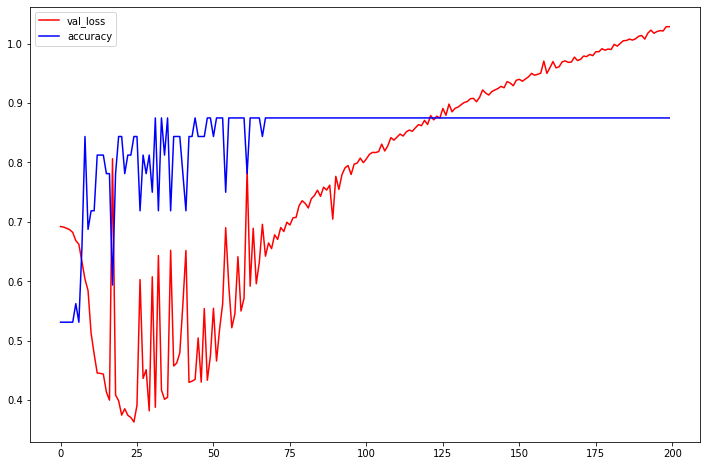

In [21]:
y_vloss = history.history['val_loss']
y_acc = history.history['val_accuracy']

x_len = np.arange(len(y_acc))
plt.figure(figsize=(12, 8))
plt.plot(x_len, y_vloss, "-", c="red", markersize=5, label='val_loss')   # 오차: 빨강
plt.plot(x_len, y_acc, "-", c="blue", markersize=5, label='accuracy')    # 정확도: 파랑
plt.legend()
plt.show()